<a href="https://colab.research.google.com/github/Valmir-unicap/Processamento-digitais-de-imagens/blob/main/Aula_sobre_determina%C3%A7%C3%A3o_autom%C3%A1tica_de_Limiar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

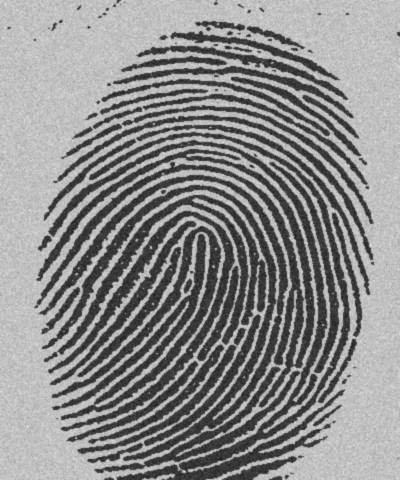

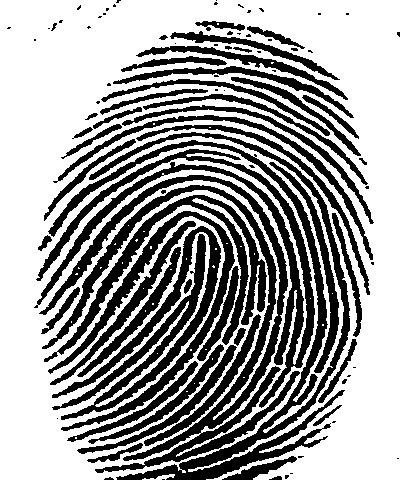

O valor de T =  126
A quantidade interações foram =  1


In [10]:
from __future__ import print_function
from __future__ import division
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow

# Carregar a imagem
src = cv.imread(cv.samples.findFile('/content/digital.jpg'))

if src is None:
    print('Could not open or find the image')
    exit(0)

# Converter a imagem para escala de cinza
gray = cv.cvtColor(src, cv.COLOR_BGR2GRAY)

# 1. Estimativa inicial para T
T = (np.min(gray) + np.max(gray)) // 2
T0 = 1  # Tolerância para a diferença em T

contador = 0

while True:

    contador=contador+1

    # 2. Segmentar a imagem usando T
    R1 = gray[gray >= T]
    R2 = gray[gray < T]

    # 3. Calcular as médias das intensidades
    mu1 = R1.mean() if R1.size > 0 else 0
    mu2 = R2.mean() if R2.size > 0 else 0

    # 4. Calcular o novo valor de T
    new_T = (mu1 + mu2) / 2

    # 5. Verificar a condição de parada
    if abs(new_T - T) < T0:
        break

    T = new_T

# Aplicar o limiar final
_, dst = cv.threshold(gray, T, 255, cv.THRESH_BINARY)

# Mostrar a imagem original e a imagem binarizada
cv2_imshow(src)
cv2_imshow(dst)
print("O valor de T = ",T)
print("A quantidade interações foram = ",contador)
